In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor

In [83]:
insurance_dataset=pd.read_csv(r'c:\\Users\\mahen\\OneDrive\\Desktop\\datasets\\insurance.csv')


In [84]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [85]:
insurance_dataset.shape

(1338, 7)

In [86]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [87]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [88]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [89]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Figure size 600x600 with 0 Axes>

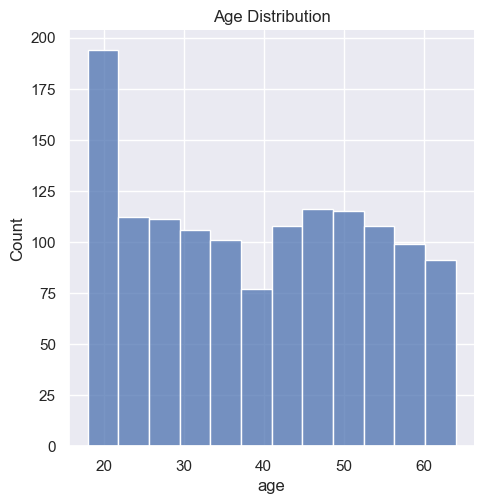

In [90]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

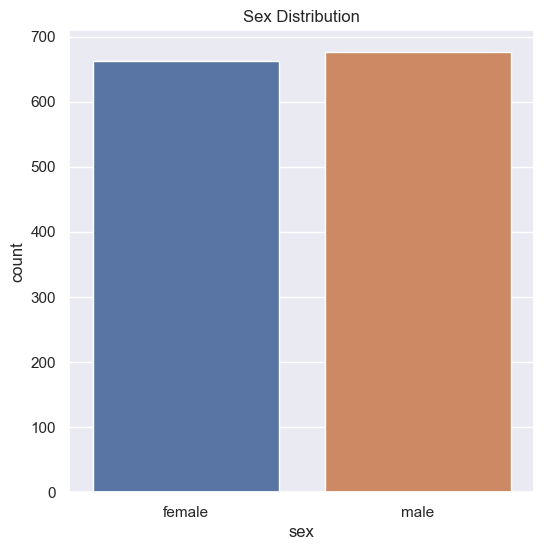

In [91]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

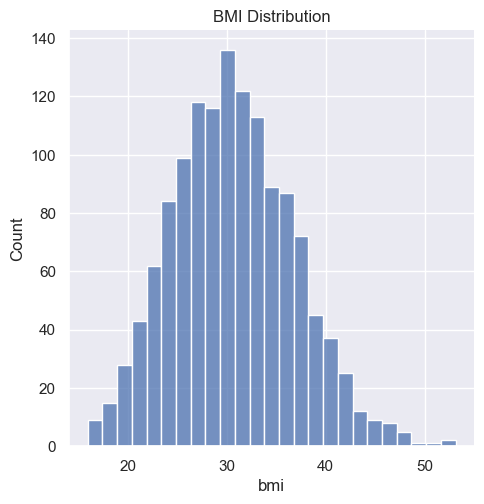

In [92]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

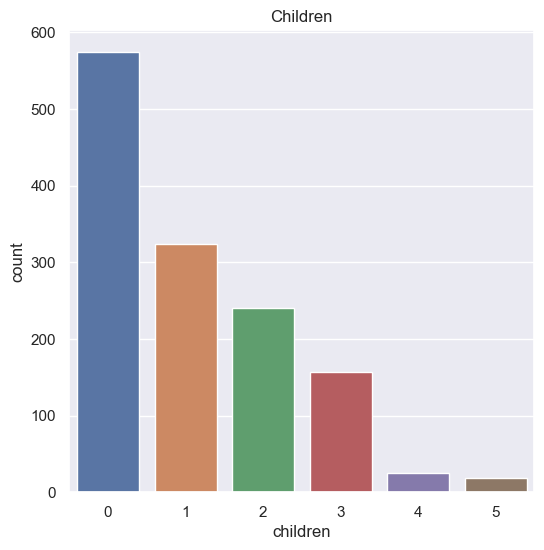

In [93]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

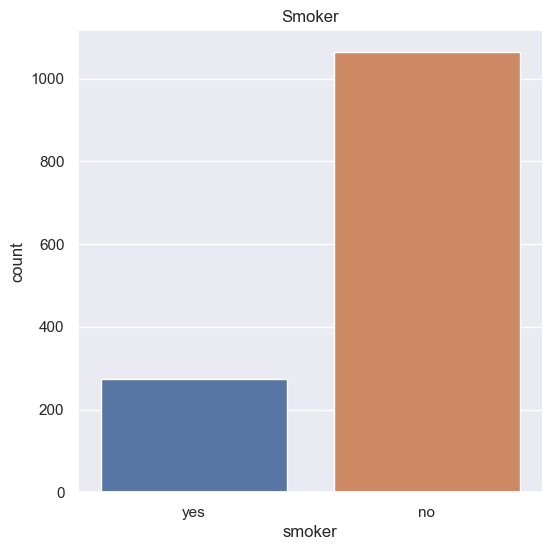

In [94]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker')
plt.show()

c:\Users\mahen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


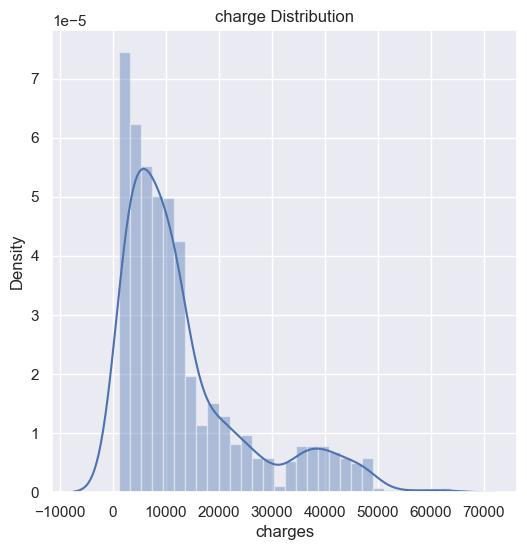

In [95]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charge Distribution')
plt.show()

In [96]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [100]:
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [101]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [106]:
X=insurance_dataset.drop('charges',axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [109]:
y=insurance_dataset['charges']
y.shape

(1338,)

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


In [113]:
model=LinearRegression()

In [114]:
model.fit(X_train,y_train)

LinearRegression()

In [115]:
prediction=model.predict(X_train)

In [121]:
r2_train=metrics.r2_score(y_train,prediction)
print('R squared value:', r2_train)

R squared value: 0.751505643411174


In [124]:
test_prediction=model.predict(X_test)

In [178]:
r2_test=metrics.r2_score(y_test,test_prediction)
print('R squared value:', r2_test)

R squared value: 0.7447273869684077


In [188]:
example=(31,1,25,0,1,0)
example_as_numpy_array=np.asarray(example)
example_as_numpy_array

array([31,  1, 25,  0,  1,  0])

In [189]:
example_reshaped=example_as_numpy_array.reshape(1,-1)
example_reshaped

array([[31,  1, 25,  0,  1,  0]])

In [194]:
pred=model.predict(example_reshaped)
print('Insurance cost for given input:',pred)

Insurance cost for given input: [3515.40226154]


c:\Users\mahen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Thank you